In [ ]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [ ]:
from qiskit.circuit.library import MCXGate
from qiskit import Aer, execute, transpile

def shift_qc(qc):
    sh1 = MCXGate(1)
    sh2 = MCXGate(2)
    sh3 = MCXGate(3)
    sh4 = MCXGate(4)
    sh5 = MCXGate(5)
    sh6 = MCXGate(6)
    sh7 = MCXGate(7)
    sh8 = MCXGate(8)
    sh9 = MCXGate(9)
    sh10 = MCXGate(10)

    # - operation
    qc.h(10)
    qc.x(10)
    qc.append(sh1, [10,9])
    qc.append(sh2, [10,9,8])
    qc.append(sh3, [10,9,8,7])
    qc.append(sh4, [10,9,8,7,6])
    qc.append(sh5, [10,9,8,7,6,5])
    qc.append(sh6, [10,9,8,7,6,5,4])
    qc.append(sh7, [10,9,8,7,6,5,4,3])
    qc.append(sh8, [10,9,8,7,6,5,4,3,2])
    qc.append(sh9, [10,9,8,7,6,5,4,3,2,1])
    qc.append(sh10, [10,9,8,7,6,5,4,3,2,1,0])
    qc.x(10)

    # + operation
    qc.append(sh1, [10,9])
    qc.x(9)
    qc.append(sh2, [10,9,8])
    qc.x(8)
    qc.append(sh3, [10,9,8,7])
    qc.x(7)
    qc.append(sh4, [10,9,8,7,6])
    qc.x(6)
    qc.append(sh5, [10,9,8,7,6,5])
    qc.x(5)
    qc.append(sh6, [10,9,8,7,6,5,4])
    qc.x(4)
    qc.append(sh7, [10,9,8,7,6,5,4,3])
    qc.x(3)
    qc.append(sh8, [10,9,8,7,6,5,4,3,2])
    qc.x(2)
    qc.append(sh9, [10,9,8,7,6,5,4,3,2,1])
    qc.x(1)
    qc.append(sh10, [10,9,8,7,6,5,4,3,2,1,0])
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)
    qc.x(8)
    qc.x(9)
    return 0

#############################

import numpy as np

def make_qcs(steps, init):
    qc = QuantumCircuit(11,11)

    qc.x(10)
    qc.h(10)
    qc.p(np.pi/2, 10)

    for i in range(steps):
        shift_qc(qc)

    qc.measure(range(10), range(10))
    return qc
#############################

def make_qcs_no_measurement(steps):
    qc = QuantumCircuit(11,11)

    qc.x(10)
    qc.h(10)
    qc.p(np.pi/2, 10)

    for i in range(steps):
        shift_qc(qc)

    return qc

##############################

def asym_make_qcs(steps, init):
    qc = QuantumCircuit(11,11)

    for i in range(steps):
        shift_qc(qc)

    qc.measure(range(10), range(10))
    return qc
#############################

def asym_make_qcs_no_measurement(steps):
    qc = QuantumCircuit(11,11)

    for i in range(steps):
        shift_qc(qc)

    return qc

##############################

def run(qc):
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(qc, simulator, shots=5000)
    result = job.result()

    counts = result.get_counts(qc)
    return counts
    #############################

def get_final_statevector(qc):
    simulator = Aer.get_backend('statevector_simulator')
    job = execute(qc, simulator)
    result = job.result()

    statevector = result.get_statevector(qc)
    return statevector

###################

def reverse_binary(bin_string):
    # Reverse the string and return it
    bin_string = bin_string[:-1]
    return bin_string[::-1]

def get_modified(counts):
    # Dictionary comprehension to create a new dictionary with the reversed keys
    reversed_counts = {reverse_binary(k): v for k, v in counts.items()}
    decimal_numbers = {}

    for binary, count in reversed_counts.items():
        decimal = int(binary, 2)
        decimal_numbers[decimal] = count


    # Subtract 1024 from keys larger than 512
    modified_data = {k - 1024 if k > 512 else k: v for k, v in decimal_numbers.items()}
    return modified_data

In [ ]:
from qiskit_ibm_provider import IBMProvider
from qiskit.providers.ibmq import IBMQ
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeCairoV2

device_backend = FakeCairoV2()
sim_cairov2 = AerSimulator.from_backend(device_backend)

In [ ]:
qc = make_qcs_no_measurement(8)
# qc.draw('mpl')

simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator, shots=100)
result = job.result()

statevector = result.get_statevector()
target = statevector.data
target

array([0.13258252-0.13258252j, 0.        +0.j        ,
       0.        +0.j        , ..., 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ])

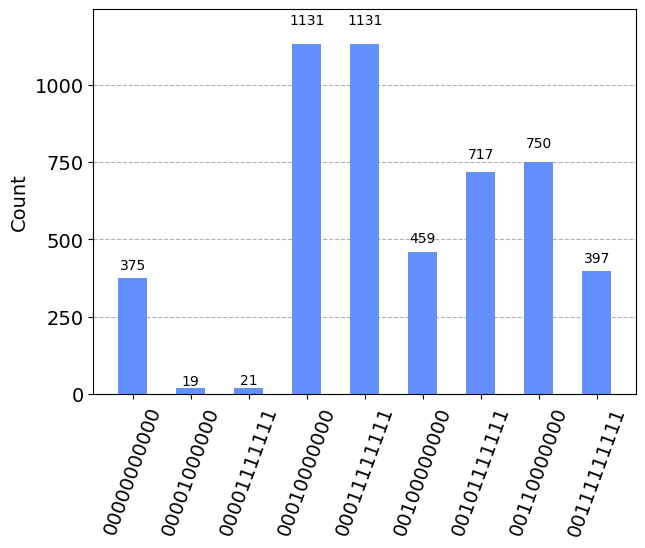

In [ ]:
qqc = make_qcs(8)

backend = Aer.get_backend('qasm_simulator')
job = execute(qqc, simulator, shots=5000)
result = job.result()

counts = result.get_counts()
plot_histogram(counts)

In [ ]:
ideal_dict_list = []

counts = get_modified(counts)
counts = dict(sorted(counts.items()))
ideal_dict_list.append(counts)

In [ ]:
counts

{-16: 13, -12: 964, -8: 2120, -4: 492, 0: 338, 4: 360, 8: 210, 12: 482, 16: 21}

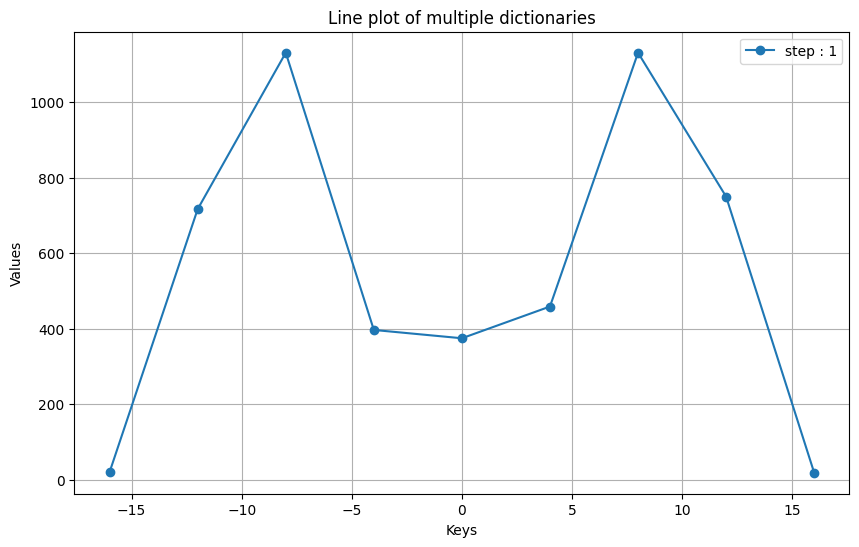

In [ ]:
import matplotlib.pyplot as plt
#plot
plt.figure(figsize=(10,6))
for i in range(0,1):
    plt.plot(list(ideal_dict_list[i].keys()), list(ideal_dict_list[i].values()), marker='o', label='step : '+str(i+1))

plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Line plot of multiple dictionaries')
plt.legend()
plt.grid()
plt.show()

In [ ]:
steps = 8
init = 'Sym '

qc = make_qcs_no_measurement(steps)
# qc.draw('mpl')

simulator = Aer.get_backend('statevector_simulator')

job = execute(qc, simulator)
result = job.result()

statevector = result.get_statevector()
target = statevector.data

In [ ]:
from scipy.optimize import minimize
from qiskit.circuit.library import EfficientSU2
from tqdm import tqdm

s_result_dict = {}
reps = 2

def objective(params, vc, tc, cost_list, pbar):
    # Update the quantum circuit with the new parameters
    updated_vc = vc.assign_parameters(params)
    tc.compose(updated_vc, qubits=range(num_qubits), inplace=True)

    # Execute the circuit
    simulator = Aer.get_backend('statevector_simulator')
    job = execute(tc, simulator)
    result = job.result()
    statevector = result.get_statevector().data

    # Calculate the fidelity between the target and output statevectors
    #fidelity = np.abs(np.dot(target.conj(), statevector))**2
    #cost = 1 - fidelity

    cost = np.linalg.norm(target - statevector)

    cost_list.append(cost)

    # Update the progress bar
    pbar.update()

    # Clear the circuit for the next iteration
    tc.data = []

    return cost

def train(target, reps, ini):
    # Define the number of qubits (10 walker qubits + 1 coin qubit)
    num_qubits = 11
    reps = reps
    target = target

    su2_gates = ['ry', 'rz']

    tc = QuantumCircuit(11,10)
    vc = EfficientSU2(num_qubits, reps=reps, su2_gates=su2_gates)
    initial_params = np.random.rand(vc.num_parameters)

    # vc = vc.assign_parameters(initial_params)
    # tc.compose(vc, qubits=range(num_qubits), inplace=True)

    iters = 300

    # Define a progress bar
    pbar = tqdm(total=iters, desc= ini + ') Optimization Progress')

    cost_list = []
    # Define the objective function

    # Run the optimizer
    s_result = minimize(objective, initial_params, args=(vc, tc, cost_list, pbar), method='COBYLA', options={'maxiter': iters})
    s_result = s_result.x
    # Close the progress bar
    pbar.close()

    return s_result

def get_sym_state(steps):
    steps = steps

    qc = make_qcs_no_measurement(steps)
    # qc.draw('mpl')

    simulator = Aer.get_backend('statevector_simulator')

    job = execute(qc, simulator)
    result = job.result()

    statevector = result.get_statevector()
    target = statevector.data
    return target

def get_asym_state(steps):
    steps = steps

    qc = asym_make_qcs_no_measurement(steps)
    # qc.draw('mpl')

    simulator = Aer.get_backend('statevector_simulator')

    job = execute(qc, simulator)
    result = job.result()

    statevector = result.get_statevector()
    target = statevector.data
    return target

for ini in ['sym', 'asym']:
    if ini == 'sym':
      for s in range(1,5):
          ini = 'sym'
          target = get_sym_state(s)
          s_result_dict[ini + '_' + str(s)] = train(target, reps, ini)
    else:
      for s in range(1,5):
          ini = 'asym'
          target = get_asym_state(s)
          s_result_dict[ini + '_' + str(s)] = train(target, reps, ini)


asym) Optimization Progress: 100%|██████████| 300/300 [00:13<00:00, 22.35it/s]


In [ ]:
qc_dict = {}
for k, v in s_result_dict.items():
    # Update the parameters in the variational circuit with optimized parameters
    params = v

    # Define the number of qubits (10 walker qubits + 1 coin qubit)
    num_qubits = 11
    reps = reps
    target = target

    su2_gates = ['ry', 'rz']

    ttc = QuantumCircuit(11,11)
    vvc = EfficientSU2(num_qubits, reps=reps, su2_gates=su2_gates)
    vvc = vvc.assign_parameters(params)

    ttc.compose(vvc, qubits=range(num_qubits), inplace=True)
    ttc.measure(range(10),range(10))
    # ttc.draw('mpl')

    qc_dict[k] = ttc

##################

from qiskit_ibm_provider import IBMProvider
from qiskit.providers.ibmq import IBMQ
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeCairoV2

device_backend = FakeCairoV2()
sim_cairov2 = AerSimulator.from_backend(device_backend)

result_dict = {}
for name, qc in qc_dict.items():
    job = execute(qc, sim_cairov2, shots=5000)
    result = job.result()
    real_counts = result.get_counts()
    real_counts = get_modified(real_counts)
    real_counts = dict(sorted(real_counts.items()))

    result_dict[name] = real_counts
    print(name + ' success')

##############

# Get keys and count for number of subplots
keys = list(result_dict.keys())
n = len(keys)

# Create subplots
fig, axs = plt.subplots(n//2, 2, figsize=(10, 5*n//2))

# Flatten the axis array if n > 2
if n > 2:
    axs = axs.ravel()

for i, key in enumerate(keys):
    # Plot data for each key in the dictionary
    data = result_dict[key]
    x = [k for k in data.keys() if -50 <= k <= 50]
    y = [data[k] for k in x]

    axs[i].bar(x, y)
    axs[i].set_title(key)
    axs[i].set_xlabel('X-axis')
    axs[i].set_ylabel('Y-axis')

plt.tight_layout()
plt.show()


asym) Optimization Progress: 100%|██████████| 1000/1000 [00:41<00:00, 23.82it/s]


sym_3 success
sym_4 success
sym_5 success
sym_6 success
sym_7 success
sym_8 success
sym_9 success
asym_3 success
asym_4 success
asym_5 success
asym_6 success
asym_7 success
asym_8 success
asym_9 success


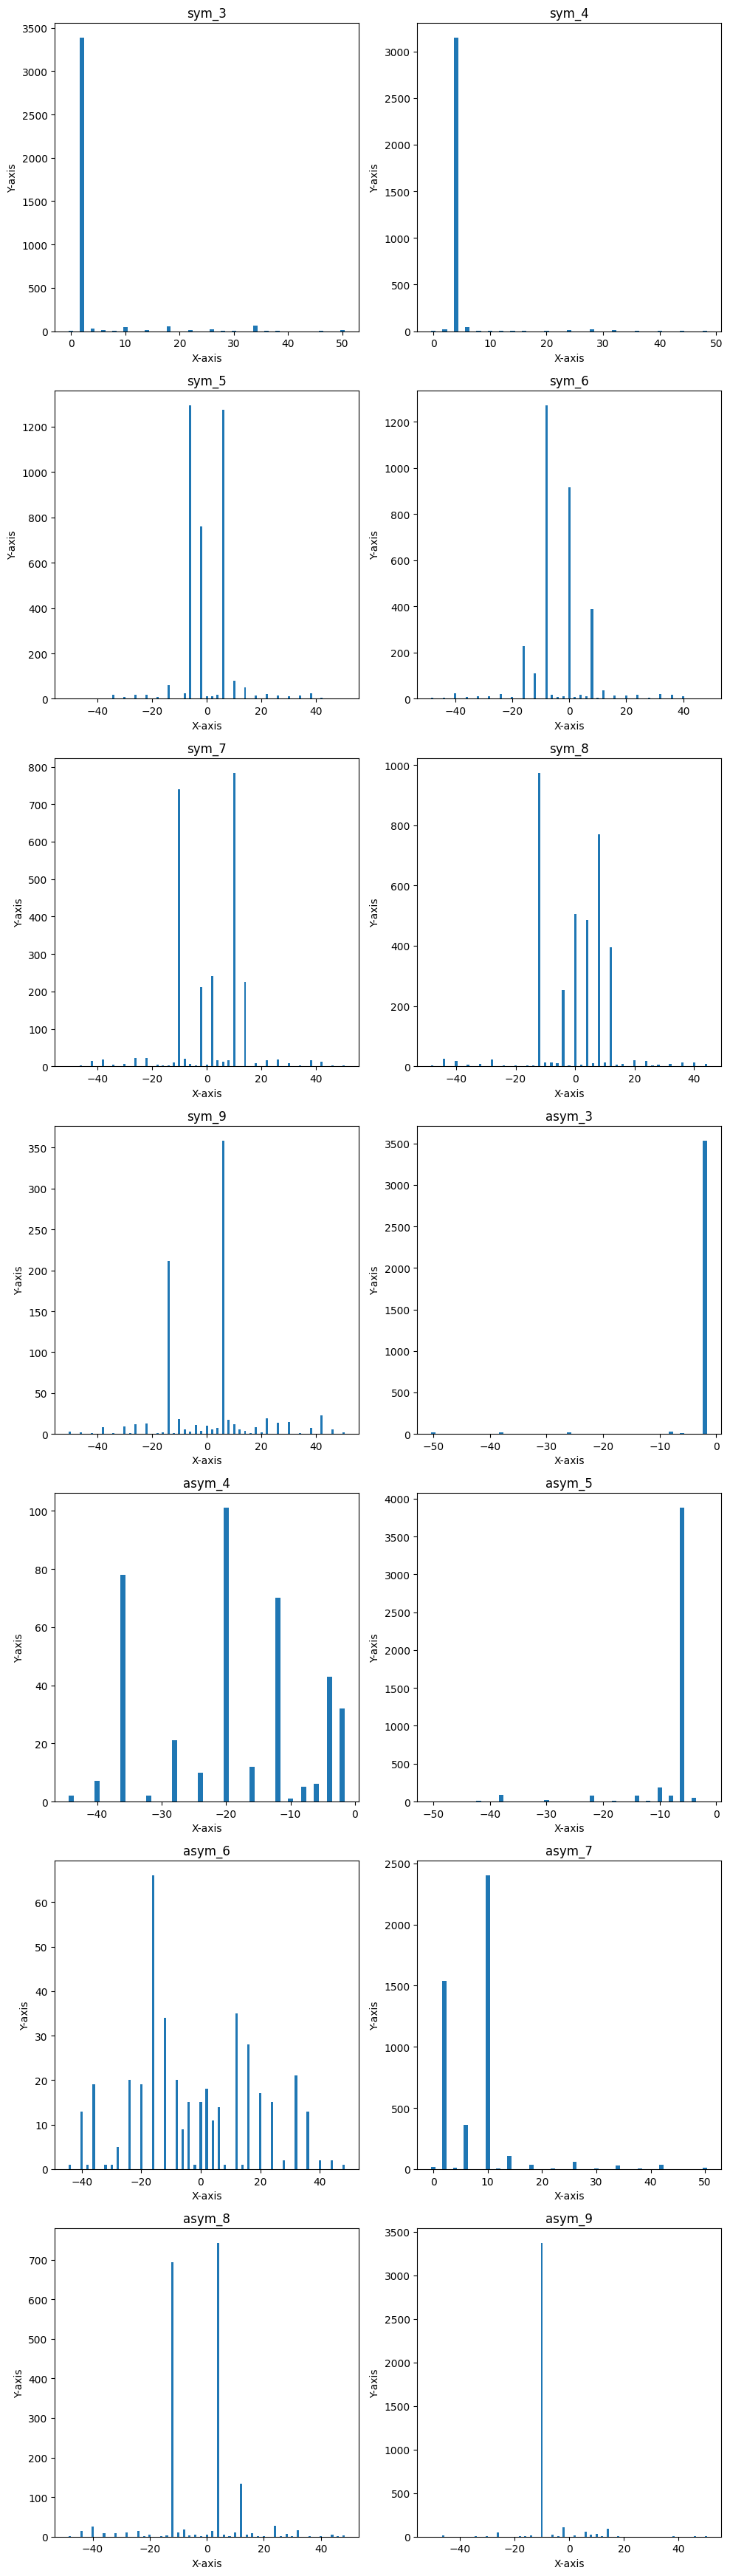

In [ ]:
from scipy.optimize import minimize
from qiskit.circuit.library import EfficientSU2
from tqdm import tqdm

s_result_dict = {}
reps = 1
step_start = 3
step_end = 9

def objective(params, vc, tc, cost_list, pbar):
    # Update the quantum circuit with the new parameters
    updated_vc = vc.assign_parameters(params)
    tc.compose(updated_vc, qubits=range(num_qubits), inplace=True)

    # Execute the circuit
    simulator = Aer.get_backend('statevector_simulator')
    job = execute(tc, simulator)
    result = job.result()
    statevector = result.get_statevector().data

    # Calculate the fidelity between the target and output statevectors
    #fidelity = np.abs(np.dot(target.conj(), statevector))**2
    #cost = 1 - fidelity

    cost = np.linalg.norm(target - statevector)

    cost_list.append(cost)

    # Update the progress bar
    pbar.update()

    # Clear the circuit for the next iteration
    tc.data = []

    return cost

def train(target, reps, ini):
    # Define the number of qubits (10 walker qubits + 1 coin qubit)
    num_qubits = 11
    reps = reps
    target = target

    su2_gates = ['ry', 'rz']

    tc = QuantumCircuit(11,10)
    vc = EfficientSU2(num_qubits, reps=reps, su2_gates=su2_gates, entanglement='full')
    initial_params = np.random.rand(vc.num_parameters)

    # vc = vc.assign_parameters(initial_params)
    # tc.compose(vc, qubits=range(num_qubits), inplace=True)

    iters = 1000

    # Define a progress bar
    pbar = tqdm(total=iters, desc= ini + ') Optimization Progress')

    cost_list = []
    # Define the objective function

    # Run the optimizer
    s_result = minimize(objective, initial_params, args=(vc, tc, cost_list, pbar), method='COBYLA', options={'maxiter': iters})
    s_result = s_result.x
    # Close the progress bar
    pbar.close()

    return s_result

def get_sym_state(steps):
    steps = steps

    qc = make_qcs_no_measurement(steps)
    # qc.draw('mpl')

    simulator = Aer.get_backend('statevector_simulator')

    job = execute(qc, simulator)
    result = job.result()

    statevector = result.get_statevector()
    target = statevector.data
    return target

def get_asym_state(steps):
    steps = steps

    qc = asym_make_qcs_no_measurement(steps)
    # qc.draw('mpl')

    simulator = Aer.get_backend('statevector_simulator')

    job = execute(qc, simulator)
    result = job.result()

    statevector = result.get_statevector()
    target = statevector.data
    return target

for ini in ['sym', 'asym']:
    if ini == 'sym':
      for s in range(step_start,step_end+1):
          ini = 'sym'
          target = get_sym_state(s)
          s_result_dict[ini + '_' + str(s)] = train(target, reps, ini)
    else:
      for s in range(step_start,step_end+1):
          ini = 'asym'
          target = get_asym_state(s)
          s_result_dict[ini + '_' + str(s)] = train(target, reps, ini)

#################

qc_dict = {}
for k, v in s_result_dict.items():
    # Update the parameters in the variational circuit with optimized parameters
    params = v

    # Define the number of qubits (10 walker qubits + 1 coin qubit)
    num_qubits = 11
    reps = reps
    target = target

    su2_gates = ['ry', 'rz']

    ttc = QuantumCircuit(11,11)
    vvc = EfficientSU2(num_qubits, reps=reps, su2_gates=su2_gates)
    vvc = vvc.assign_parameters(params)

    ttc.compose(vvc, qubits=range(num_qubits), inplace=True)
    ttc.measure(range(10),range(10))
    # ttc.draw('mpl')

    qc_dict[k] = ttc

##################

from qiskit_ibm_provider import IBMProvider
from qiskit.providers.ibmq import IBMQ
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeCairoV2

device_backend = FakeCairoV2()
sim_cairov2 = AerSimulator.from_backend(device_backend)

result_dict = {}
for name, qc in qc_dict.items():
    job = execute(qc, sim_cairov2, shots=5000)
    result = job.result()
    real_counts = result.get_counts()
    real_counts = get_modified(real_counts)
    real_counts = dict(sorted(real_counts.items()))

    result_dict[name] = real_counts
    print(name + ' success')

##############

# Get keys and count for number of subplots
keys = list(result_dict.keys())
n = len(keys)

# Create subplots
fig, axs = plt.subplots(n//2, 2, figsize=(10, 5*n//2))

# Flatten the axis array if n > 2
if n > 2:
    axs = axs.ravel()

for i, key in enumerate(keys):
    # Plot data for each key in the dictionary
    data = result_dict[key]
    x = [k for k in data.keys() if -50 <= k <= 50]
    y = [data[k] for k in x]

    axs[i].bar(x, y)
    axs[i].set_title(key)
    axs[i].set_xlabel('X-axis')
    axs[i].set_ylabel('Y-axis')

plt.tight_layout()
plt.show()


In [ ]:
s_result_dict['sym_7']

array([ 1.56986806e+00,  1.57103544e+00,  1.57370556e+00,  1.57288417e+00,
        1.57259470e+00,  1.56999161e+00,  1.34464492e+00,  1.58856587e+00,
        1.49303351e-02,  1.68309097e+00,  1.56813898e+00,  3.02642415e-03,
       -1.56332632e-03,  1.57340355e-03,  1.50079143e-04,  8.20227826e-04,
       -2.57973288e-03,  1.46747661e+00,  3.11315573e+00, -6.68562122e-01,
        1.89931427e-03, -1.45916014e-03,  1.57033350e+00,  1.56673242e+00,
        1.56882381e+00,  1.57253969e+00,  1.56865084e+00,  1.57021806e+00,
        1.57059546e+00,  6.92669343e-01,  2.25377870e+00,  1.46264030e+00,
       -3.44394064e-03,  7.01461333e-01, -8.18105511e-02,  1.17491678e+00,
        8.06203897e-01, -4.81097627e-01,  3.38618410e-01,  6.76827458e-01,
        1.53577252e+00,  1.52841638e+00, -5.73497008e-01, -1.57680340e+00])

sym_3 success
sym_4 success
sym_5 success
sym_6 success
sym_7 success
sym_8 success
sym_9 success
asym_3 success
asym_4 success
asym_5 success
asym_6 success
asym_7 success
asym_8 success
asym_9 success


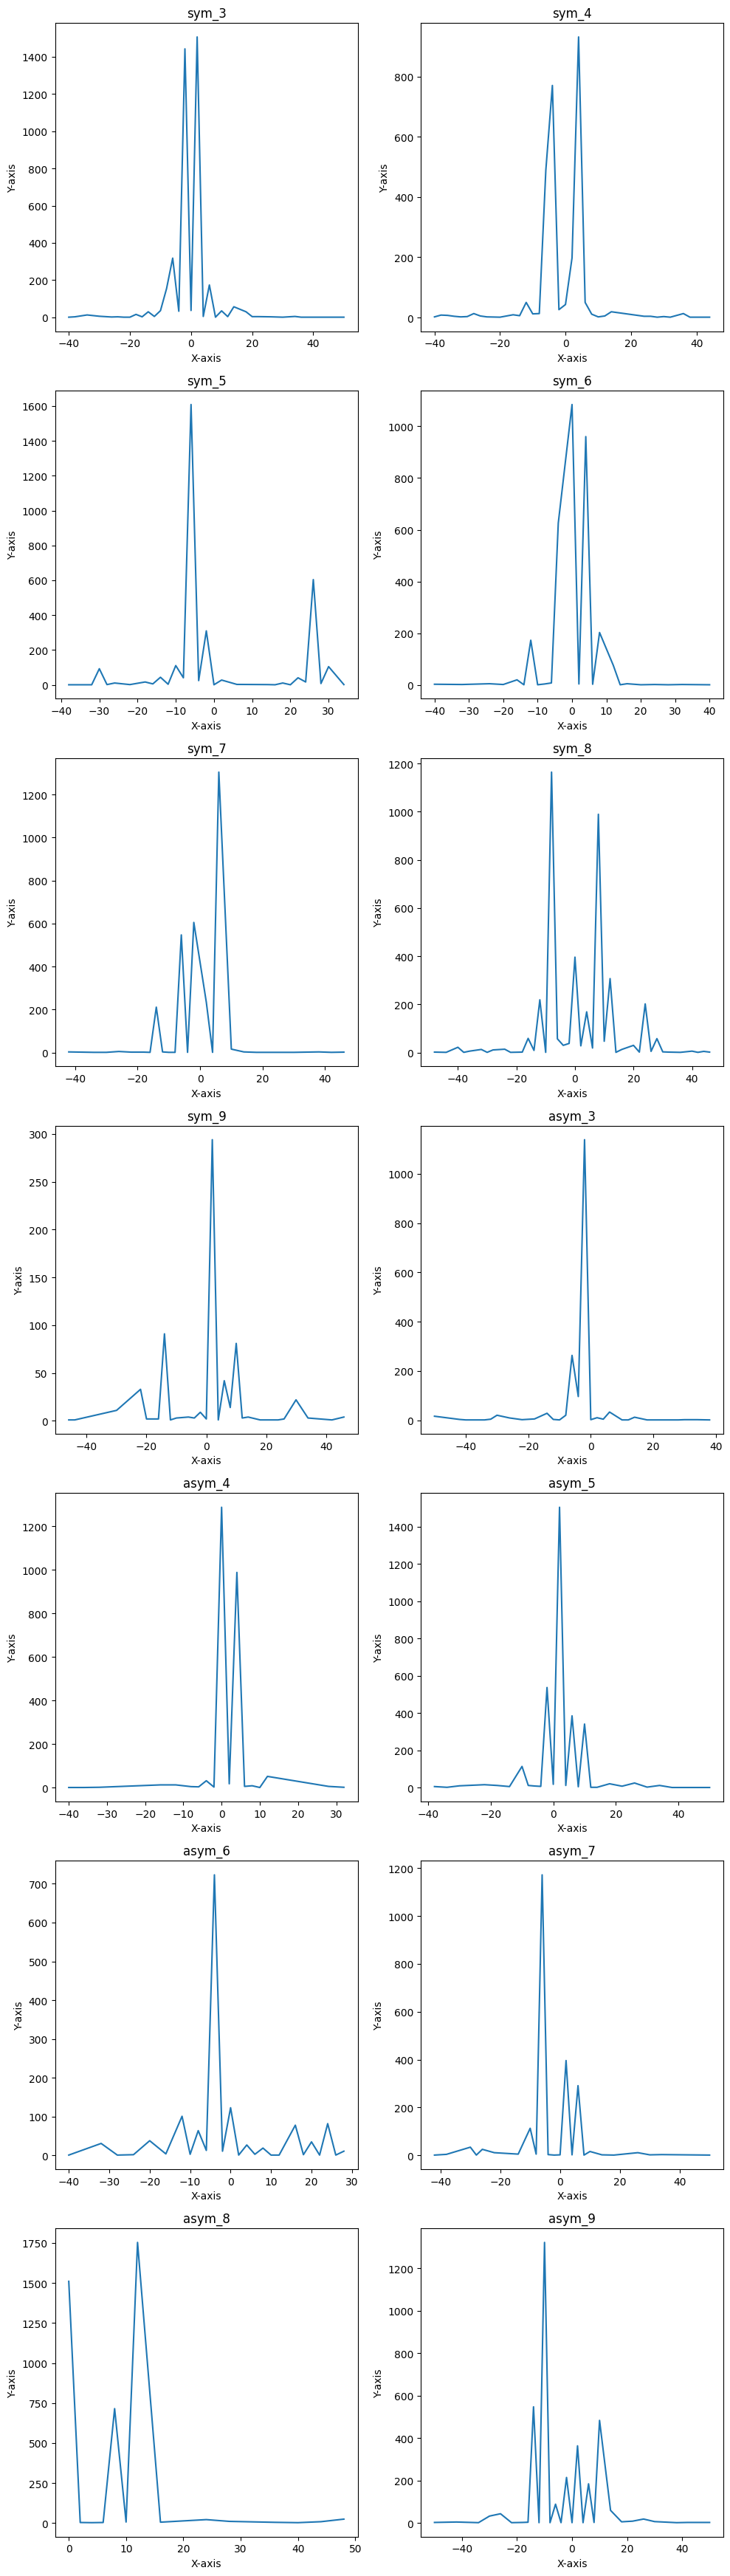

In [ ]:
#################

qc_dict = {}
for k, v in s_result_dict.items():
    # Update the parameters in the variational circuit with optimized parameters
    params = v

    # Define the number of qubits (10 walker qubits + 1 coin qubit)
    num_qubits = 11
    reps = reps
    target = target

    su2_gates = ['ry', 'rz']

    ttc = QuantumCircuit(11,11)
    vvc = EfficientSU2(num_qubits, reps=reps, su2_gates=su2_gates)
    vvc = vvc.assign_parameters(params)

    ttc.compose(vvc, qubits=range(num_qubits), inplace=True)
    ttc.measure(range(10),range(10))
    # ttc.draw('mpl')

    qc_dict[k] = ttc

##################

from qiskit_ibm_provider import IBMProvider
from qiskit.providers.ibmq import IBMQ
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeCairoV2

simulator = Aer.get_backend('qasm_simulator')

device_backend = FakeCairoV2()
sim_cairov2 = AerSimulator.from_backend(device_backend)

result_dict = {}
for name, qc in qc_dict.items():
    job = execute(qc, simulator, shots=5000)
    result = job.result()
    real_counts = result.get_counts()
    real_counts = get_modified(real_counts)
    real_counts = dict(sorted(real_counts.items()))

    result_dict[name] = real_counts
    print(name + ' success')

##############

# Get keys and count for number of subplots
keys = list(result_dict.keys())
n = len(keys)

# Create subplots
fig, axs = plt.subplots(n//2, 2, figsize=(10, 5*n//2))

# Flatten the axis array if n > 2
if n > 2:
    axs = axs.ravel()

for i, key in enumerate(keys):
    # Plot data for each key in the dictionary
    data = result_dict[key]
    x = [k for k in data.keys() if -50 <= k <= 50]
    y = [data[k] for k in x]

    axs[i].plot(x, y)
    axs[i].set_title(key)
    axs[i].set_xlabel('X-axis')
    axs[i].set_ylabel('Y-axis')

plt.tight_layout()
plt.show()


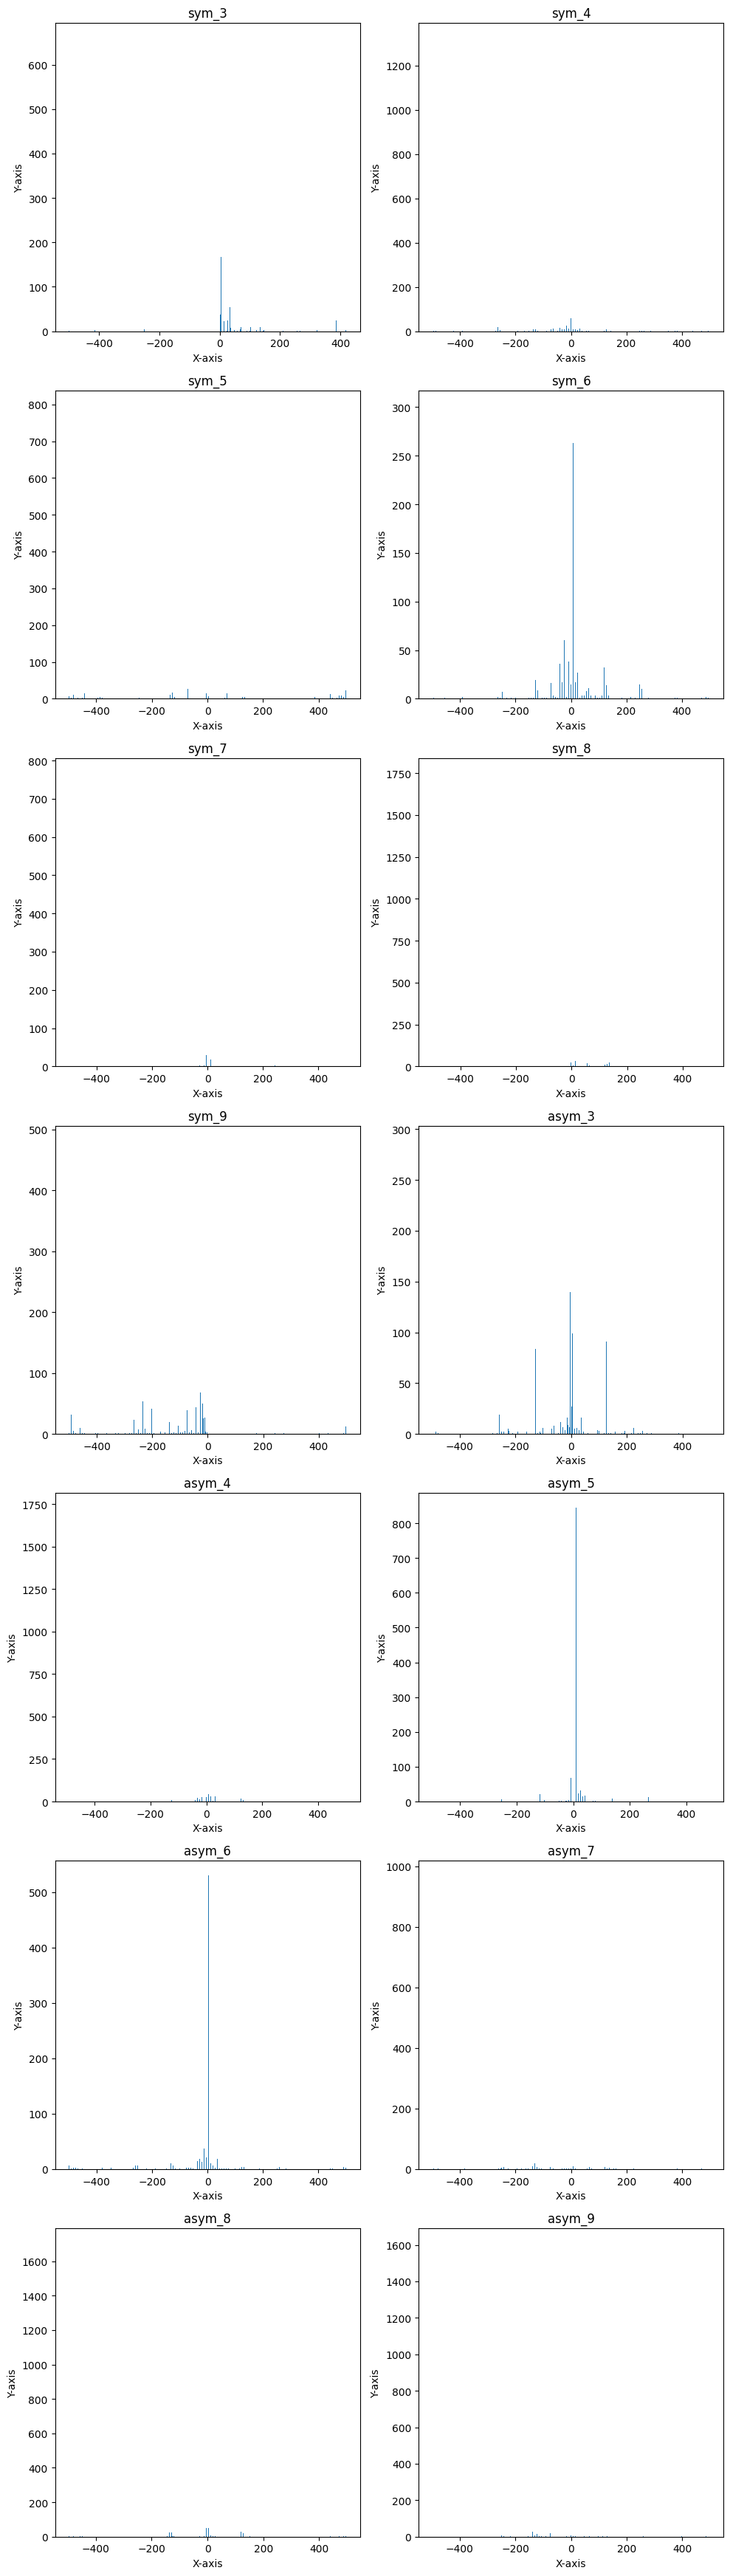

In [ ]:
# Get keys and count for number of subplots
keys = list(result_dict.keys())
n = len(keys)

# Create subplots
fig, axs = plt.subplots(n//2, 2, figsize=(10, 5*n//2))

# Flatten the axis array if n > 2
if n > 2:
    axs = axs.ravel()

for i, key in enumerate(keys):
    # Plot data for each key in the dictionary
    data = result_dict[key]
    x = [k for k in data.keys() if -500 <= k <= 500]
    y = [data[k] for k in x]

    axs[i].bar(x, y)
    axs[i].set_title(key)
    axs[i].set_xlabel('X-axis')
    axs[i].set_ylabel('Y-axis')

plt.tight_layout()
plt.show()
